In [1]:
#USING A CUSTOM LIBRARY
include("ODE.jl")
using .ODE, Plots, Statistics

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


## PC-Exercise 8.1.1

In [5]:
sig4 = SignificantDigits(4)

SignificantDigits(4)

In [2]:
#PC-Exercise 8.1.1
x8_1_1(t) = exp(-5t);
a8_1_1(x,t) = -5x;

In [6]:
nb8_1_1_a = FundamentalNumericalBase(a8_1_1,2^-3,sig4);
nb8_1_1_b = FundamentalNumericalBase(a8_1_1,2^-5,sig4);

LoadError: MethodError: [0mCannot `convert` an object of type [92mSignificantDigits[39m[0m to an object of type [91mSignificance[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T at essentials.jl:205

In [4]:
p = plot(0.0:nb8_1_1_b.Δt:0.99, [[x8_1_1(t) for t=0.0:nb8_1_1_b.Δt:0.99],euler_method(nb8_1_1_b, 1.0,0.0,1.0)])
plot!(p,euler_method(nb8_1_1_a, 1.0,0.0,1.0),0.0:nb8_1_1_a.Δt:0.99)

LoadError: UndefVarError: nb8_1_1_b not defined

## PC-Exercise 8.1.2
For the IVP in PC-Exercise 8.1.1, calculate the global discretization error at time $t=1$ for the euler method with time steps of equal length $\Delta = 2^{-n}, n\in \{0,1,\dots,13\}$, rounding off to 5 digits. Plot the $\log_2$ of the errorsm against $\log_2 \Delta$ and determine the slope of the resulting curve.|

In [5]:
#8_1_2: make a list of numerical bases
deltas = [2.0^-i for i = 0:13]
bases = [ExtendedNumericalBase(x8_1_1,a8_1_1,delta) for  delta = deltas];

global_errors = zeros(14)


for (i,base) in enumerate(bases)

    #Calculate method
    x,y,z = euler_method_with_local_errors(base, 1.0, 0.0, 1.0)
    
    #issue
    local_error = y-x
    global_errors[i] = sum(y-x)
    
end

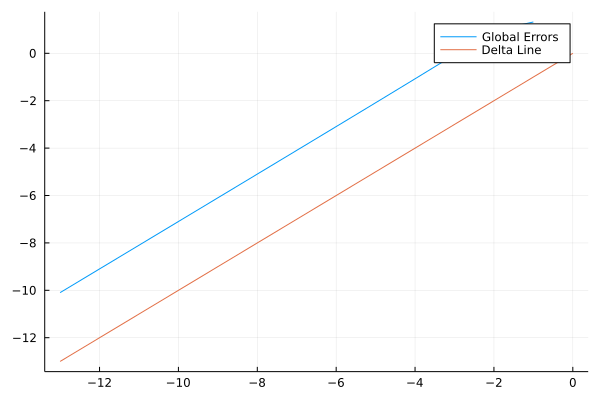

In [6]:
plot(log2.(deltas)
    ,[log2.(global_errors),log2.(deltas)]
    ,labels = ["Global Errors" "Delta Line"]
)

## PC-Exercise 8.1.3
Repeat PC-Exercise 8.1.2 using Heun's method. Compare results with eulers method.

In [62]:
#find the list of estimates.

global_errors = zeros(14)


for (i,base) in enumerate(bases)

    #Calculate method
    x,y,z = heuns_method_with_local_errors(base, 1.0, 0.0, 1.0)
    
    #Get final results
    local_error = abs.(y-x)# this shouldn't be needed, correct?
    global_errors[i] = sum(local_error)

    
end

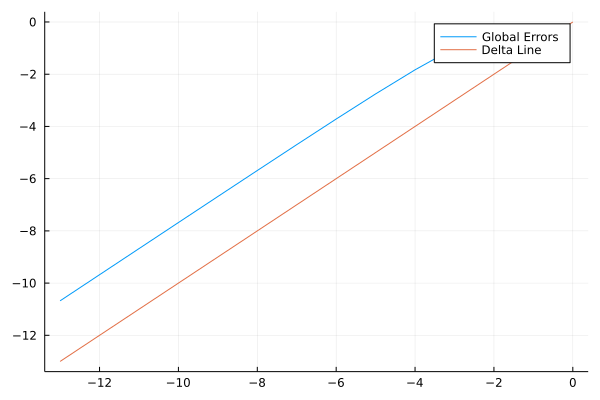

In [63]:
plot(log2.(deltas)
    ,[log2.(global_errors),log2.(deltas)]
    ,labels = ["Global Errors" "Delta Line"]
)

## PC-Exercise 8.1.5
Repeat PC-Exercise 8.1.3 using the 3-step Adams-Bashford Method with the Heun method as its starting routine.

In [1]:
x,y,z = ab_method_with_local_errors(bases[5], 1.0, 0.0, 1.0)

LoadError: UndefVarError: bases not defined

In [48]:
#find the list of estimates.

global_errors = []

for (i,base) in enumerate(bases)
    #println(i)
    if i < 4
        continue
    end
    #Calculate method
    x,y,z = ab_method_with_local_errors(bases[i], 1.0, 0.0, 1.0)

    local_errors = y-x

    append!(global_errors, sum(local_errors))
    
    #Not sure where the error is
end


In [53]:
log2.(global_errors)

11-element Vector{Float64}:
  3.336192686668997
  4.244628076360336
  5.139100081048691
  6.0709605981499495
  7.032330843339255
  8.011743363772256
  9.001111644549537
  9.995708581333226
 10.99298489483043
 11.99161746760864
 12.990932352285807

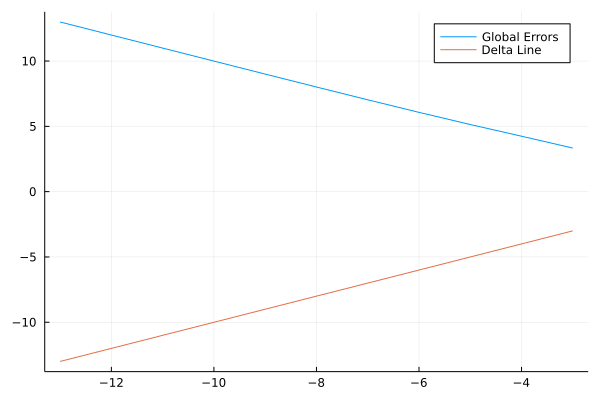

In [54]:
plot(log2.(deltas[4:14])
    ,[log2.(global_errors),log2.(deltas[4:14])]
    ,labels = ["Global Errors" "Delta Line"]
)

## PC-Exercise 8.1.7
Compare the error of the Euler and Richardson/Romberg extrapolation approximations of X(1) for the solution of the initial value problem
$$
\frac{\partial x}{\partial t} = -x, x(0)=1
$$
for equal time steps $\Delta = 2^{-3}, \dots, 2^{-10}$.
Plot $\log_2$ of the errors against $\log_2 \Delta$.

In [13]:
#Values of the exact solution
f8_1_7(t) = exp(-t);
a8_1_7(x,t) = -x;

exact_solutions = [f8_1_7.(0:(2.0^(-n)):1) for n=3:10];

time_steps = [(2.0^(-n)) for n=3:10];
println(time_steps)

numerical_bases = [FundamentalNumericalBase(a8_1_7,2.0^(-n)) for n=3:10];

[0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


In [14]:
#Values of the Euler solution
#Calculate running Current global error
global_error_euler = []
for (i,nb) in enumerate(numerical_bases)
    append!(global_error_euler, last(euler_method(nb,1.0,0.0,1.0)) - last(exact_solutions[i]))
end
log2.(global_error_euler) #Looks correct

8-element Vector{Float64}:
  -5.3325587045874085
  -6.388903676870055
  -7.416102556232911
  -8.429472734763305
  -9.436102146875374
 -10.439403130992712
 -11.441050216792112
 -12.441872911126215

In [15]:
#values of the Richardson extrapolation
#Calculate running Global error
global_error_richardson = []
for (i,nb) in enumerate(numerical_bases)
    append!(global_error_richardson, abs(last(richardson_extrapolation_of_euler(numerical_bases[1],1.0,0.0,1.0))-last(exact_solutions[1])))
end
log2.(global_error_richardson) #TODO: Error in how I calculate global truncation error

8-element Vector{Float64}:
 -10.038975181026206
 -10.038975181026206
 -10.038975181026206
 -10.038975181026206
 -10.038975181026206
 -10.038975181026206
 -10.038975181026206
 -10.038975181026206

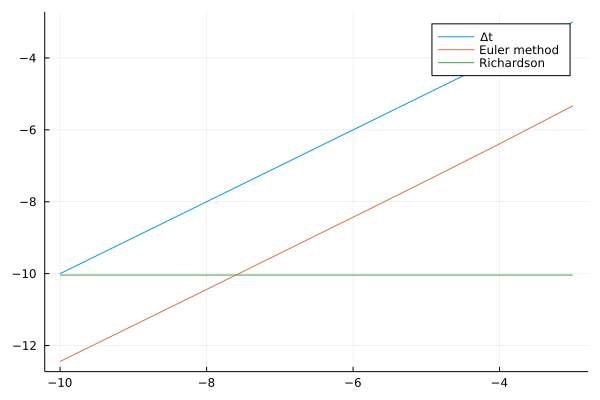

In [16]:
#plot the errors
plot(log2.(time_steps)
    ,[log2.(time_steps) log2.(global_error_euler) log2.(global_error_richardson)]
    ,labels = ["Δt" "Euler method" "Richardson"]
)

## PC-Exercise 8.2.1
Use the 2nd Order truncated taylor method with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-10}$
to calculate approximations to the solution:
$$
    x(t)
$$
of the initial value problem
$$
$$
over the interval $0\leq t \leq 0.5$
Repeat the calculations using the 3rd order truncated taylor method.
Plot $\log_2$ of the global discretiation errors against $\log_2 \Delta$.

## PC-Exercise 8.2.2
Repeat PC-Exercise 8.2.1 using the 4th order Runge-Kutta method with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-7}$

## PC-Exercise 8.2.3

## PC-Exercise 8.4.1
Calculate 300 iterates of
$$
$$
with initial value $y_0 = 0.1$ using the prescribed arithematic of the PC, 
at each step rounding the value of $Y_{n+1}$ to the first 4 significant figures.
Plot the relative frequencies of the roundoff errors in a histogram on 
using 40 equal bins.

In [17]:
function iter8_4_2(yn::Float64)
    return π/3 * yn
end

iter8_4_2 (generic function with 1 method)

In [18]:
y = 0.1
N8_4_1 = 300
rounding_errors = zeros(N8_4_1)

for i in 2:N8_4_1
    yi = iter8_4_2(y)
    rounding_errors[i] = yi - round(yi, digits=4)
    y = yi
end

In [19]:
mean(rounding_errors),std(rounding_errors)#,max(rounding_errors),min(rounding_errors)

(1.3419618906535906e-6, 2.816802960951247e-5)

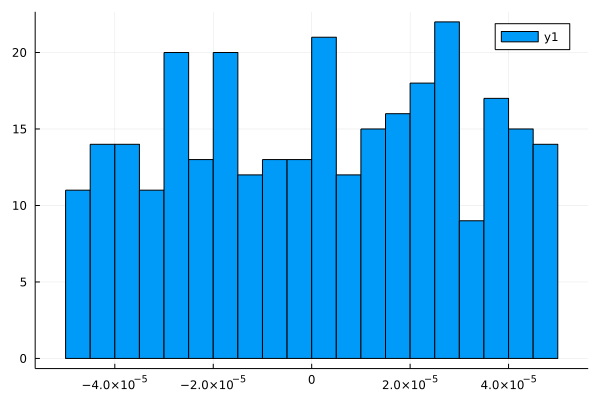

In [20]:
histogram(rounding_errors,bins=40)

## PC-Exercise 8.4.2
Use the Euler method with equal length time steps $\Delta = 2^{-2}$ for the differential equation 
$$
\partial x = x \partial t
$$
over the interval $0 \leq t \leq 1$ for 1,000 different initial values $x(0) \in [0.4,0.6]$.

Use both the prescribed arithematic and round to 4 decimal places to determine the final 
accumulative roundoff error in each case,
plotting the roundoff error in a histogram with 40 equal subintervals.
In addition, calculate the sample mean and sample variance.

In [21]:
#record the known solution and get the differential version.
f8_4_2(x,t) = exp(x);
f8_4_2′(x,t) = x;

N8_4_2 = 1000

nb8_4_2 = ExtendedNumericalBase(f8_4_2,f8_4_2′,2^-2);
x0 = (2*rand(N8_4_2).+4.0)/10;
R = zeros(N8_4_2);

In [22]:
function record8_4(nb::NumericalBase,x0,N)
    for i in 1:N
        yi = euler_method(nb,x0[i],0.0,1.0)[4]
        R[i] = yi - round(yi, digits=4)
    end
    
    return R,mean(R),std(R)
end

record8_4 (generic function with 1 method)

Mean: 1.1902378284953663e-6
stdev: 2.8201858163873686e-5


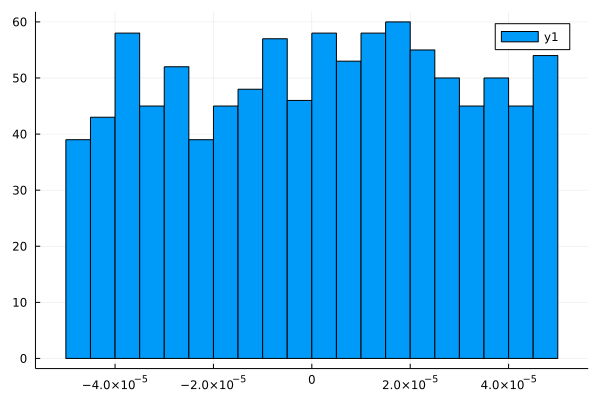

In [23]:
err_x,mean_x,std_x = record8_4(nb8_4_2,x0,N8_4_2)
println("Mean: ",mean_x,"\n","stdev: ", std_x)

histogram(R,bins=40)

## PC-Exercise 8.4.3
Repeat PC-Exercise 8.4.2 with N = 200 and with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-5}$
, determine the roundoff error in each case. plot the 90% confidence intervales for the mean value of the error against $\Delta$.

In [24]:
nb8_4_3_a = FundamentalNumericalBase(f8_4_2,2^-3);
nb8_4_3_b = FundamentalNumericalBase(f8_4_2,2^-4);
nb8_4_3_c = FundamentalNumericalBase(f8_4_2,2^-5);

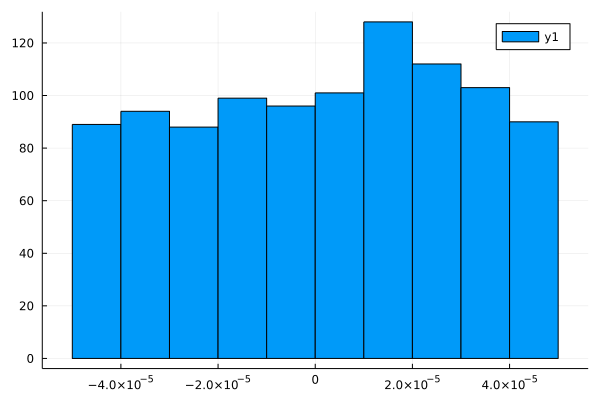

In [25]:
err_a,mean_a,std_a = record8_4(nb8_4_3_a,x0,200);
histogram(err_a)

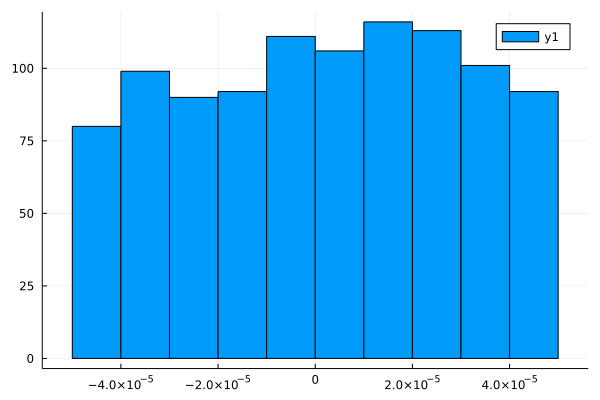

In [26]:
err_b,mean_b,std_b = record8_4(nb8_4_3_b,x0,200);
histogram(err_b)

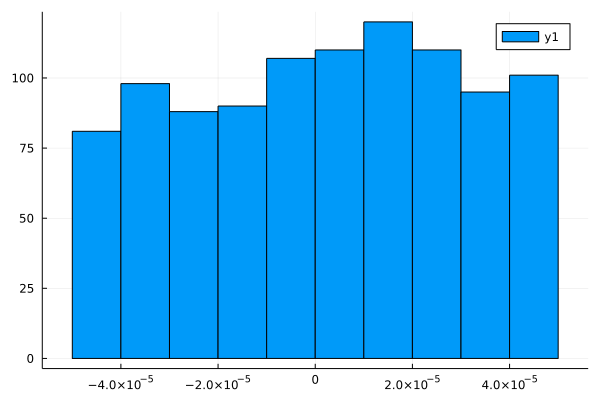

In [27]:
err_c,mean_c,std_c = record8_4(nb8_4_3_c,x0,200);
histogram(err_c)

In [28]:
v = [-1 1]
#90% confidence intervals #TODO
bounds_a = 1.65*std_a *v .+ mean_a;
bounds_b = 1.65*std_b *v .+ mean_b;
bounds_c = 1.65*std_c *v .+ mean_c;

In [29]:
println(bounds_a)
println(bounds_b)
println(bounds_c)

[-4.483144177007432e-5 4.763477981496185e-5]
[-4.444477059198064e-5 4.751815925956397e-5]
[-4.438975104813609e-5 4.796550750296387e-5]


In [30]:
#Plot: TODO
#plot this as widths maybe?
bounds_a

1×2 Matrix{Float64}:
 -4.48314e-5  4.76348e-5